In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [112]:
df = pd.read_csv('../data/textbooks.csv')

In [113]:
df.head()

,dept_abbr,course,isbn,ucla_new,amaz_new,more,diff
0,Am Ind,C170,978-0803272620,27.67,27.95,Y,-0.28
1,Anthro,9,978-0030119194,40.59,31.14,Y,9.45
2,Anthro,135T,978-0300080643,31.68,32.00,Y,-0.32
3,Anthro,191HB,978-0226206813,16.00,11.52,Y,4.48
4,Art His,M102K,978-0892365999,18.95,14.21,Y,4.74


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dept_abbr  73 non-null     object 
 1   course     73 non-null     object 
 2   isbn       73 non-null     object 
 3   ucla_new   73 non-null     float64
 4   amaz_new   73 non-null     float64
 5   more       73 non-null     object 
 6   diff       73 non-null     float64
dtypes: float64(3), object(4)
memory usage: 4.1+ KB


Text(0, 0.5, 'Frequency')

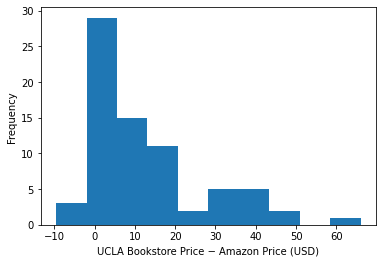

In [115]:
plt.hist(df['diff'])
plt.xlabel("UCLA Bookstore Price − Amazon Price (USD)")
plt.ylabel("Frequency")

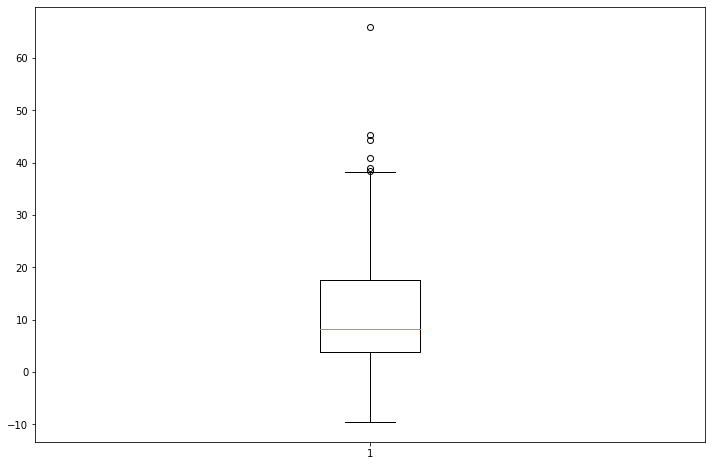

In [116]:
plt.figure(figsize=(12, 8))
plt.boxplot(df['diff'])
plt.show()

In [117]:
# First quartile (Q1)
Q1 = np.percentile(df['diff'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df['diff'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
 
print(IQR)

13.79


In [118]:
# lower-bound
l_b = Q1 - 1.5 * IQR

# upper-bound
u_b = Q3 + 1.5 * IQR

In [119]:
df = df[(df['diff'] >= l_b) & (df['diff'] <= u_b)]['diff']

**CONDITIONS FOR THE t-distribution**

1. Independence
2. Normality
    * $n \lt 30$, no clear outliers
    * $n \ge 30$, no extreme outliers 

In [120]:
# identify outliers
x_bar = np.mean(df)
print(x_bar)

s = np.std(df)
print(s)

n = df.size
print(n)

print(np.amax(df), np.amin(df))

max_val = x_bar + 3 * s
min_val = x_bar - 3 * s

print(max_val, min_val)

9.813283582089552
10.229356844733427
67
38.23 -9.53
40.50135411628983 -20.874786952110732


**Hypothesis**

$H_o = 0, \text{there's no difference in the average prices}\\$
$H_A \neq 0, \text{there's difference in the average prices}$

In [121]:
# null-hypothesis
h_0 = 0

**standard error**

$SE = \frac{\sigma}{\sqrt{n}} \approx \frac{s}{\sqrt{n}}$

In [122]:
# std err
std_err = s / math.sqrt(n)
print(std_err)

1.2497148418434503


**t-statistic**

$t = \frac{\bar{x} - \mu}{SE}$

In [123]:
# t-statistic
t = (x_bar - h_0)/std_err
print(t)

7.852418210552744


**degrees of freedom**

$df = n - 1$

In [124]:
# degree of freedom
dof = n - 1
print(dof)

66


***p-value***

In [125]:
# p-value
result = stats.t.sf(abs(t), df=dof)*2
print(result)

4.864537029174424e-11
